In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# About Dataset
The U.S. Census Bureau conducts Annual Surveys of State and Local Government Finances as authorized by Title 13, United States Code, Section 9. The data collection for the state and local finance survey is comprised of three modes to obtain data: mail canvass, Internet collection, and central collection from state sources. Collection methods vary by state and type of government.

The data provides high-level statistics about US counties regarding people and population, race and ethnicity, families and living arrangements, health, education, business and economy, employment, housing, and income and poverty.

# Data Segmentation
The chosen dataset is segmented in different groups. Some of the groupings that we are going to tackle are ethnicity – it plays a major role in our understanding of the products the store needs to have. We are also going to use the columns Professional and Income - which are going to be big factors to help us understand what should be product price points that the retail location will need as affordability of the product for the consumer is a big concern when it comes to retail outlets.

# Inclusion Criteria
For this project, we are going to be focusing on key element like the Income per Capita of different households. Variable such as Ethnicity is going to play a major role as it give us information like what’s the density of Asians or Blacks in a particular county. We are also going to take into consideration the incomes of Men and Women individually. The professions of different people according to their location is also going to be included in our research so as to have clear financial understanding of different regions. This will help us navigate the tedious task of where and how to make the retail space successful.

# For our project we will be using two .csv files for our Analysis.

1. acs2015_census_tract_data.csv
2. acs2017_census_tract_data.csv

# Loading Dataset

Using the census Dataset of 2015 - acs2015_census_tract_data.csv


In [12]:
df1=  pd.read_csv('/content/drive/MyDrive/Datasets/acs2015_census_tract_data.csv')

# Data Description (2015 census data)

**Sample preview of Data**

In [13]:
df1.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


**Finding number of rows and number of columns**

In [14]:
df1.shape

(74001, 37)

**Columns present in Dataset**

In [ ]:
df1.columns

Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

**Descriptive statistics for numerical fields in Datasets**

In [15]:
df1.describe()

,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,7.400100e+04,74001.000000,74001.000000,74001.000000,73311.000000,73311.000000,73311.000000,73311.000000,73311.000000,73311.000000,...,73204.000000,73204.000000,73204.000000,73052.000000,74001.000000,73194.000000,73194.000000,73194.000000,73194.000000,73199.000000
mean,2.839113e+10,4325.591465,2127.648816,2197.942649,16.862810,62.032106,13.272581,0.727726,4.588253,0.145012,...,3.123340,1.891606,4.368093,25.667357,1983.907366,78.975238,14.621566,6.233814,0.169772,9.028663
std,1.647593e+10,2129.306903,1072.332031,1095.730931,22.940695,30.684152,21.762483,4.488340,8.794003,1.037354,...,5.881237,2.596198,3.904990,6.964881,1073.429808,8.345758,7.535786,4.042990,0.458227,5.955441
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.303901e+10,2891.000000,1409.000000,1461.000000,2.400000,39.400000,0.700000,0.000000,0.200000,0.000000,...,0.400000,0.400000,1.800000,20.800000,1249.000000,74.600000,9.600000,3.500000,0.000000,5.100000
50%,2.804700e+10,4063.000000,1986.000000,2066.000000,7.000000,71.400000,3.700000,0.000000,1.400000,0.000000,...,1.400000,1.100000,3.500000,25.000000,1846.000000,80.100000,13.400000,5.500000,0.000000,7.700000
75%,4.200341e+10,5442.000000,2674.000000,2774.000000,20.400000,88.300000,14.400000,0.400000,4.800000,0.000000,...,3.500000,2.500000,5.900000,29.800000,2553.000000,84.600000,18.200000,8.100000,0.000000,11.400000
max,7.215375e+10,53812.000000,27962.000000,27250.000000,100.000000,100.000000,100.000000,100.000000,91.300000,84.700000,...,100.000000,100.000000,100.000000,80.000000,24075.000000,100.000000,100.000000,100.000000,26.500000,100.000000


**Data types in the Dataset**

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      74001 non-null  int64  
 1   State            74001 non-null  object 
 2   County           74001 non-null  object 
 3   TotalPop         74001 non-null  int64  
 4   Men              74001 non-null  int64  
 5   Women            74001 non-null  int64  
 6   Hispanic         73311 non-null  float64
 7   White            73311 non-null  float64
 8   Black            73311 non-null  float64
 9   Native           73311 non-null  float64
 10  Asian            73311 non-null  float64
 11  Pacific          73311 non-null  float64
 12  Citizen          74001 non-null  int64  
 13  Income           72901 non-null  float64
 14  IncomeErr        72901 non-null  float64
 15  IncomePerCap     73261 non-null  float64
 16  IncomePerCapErr  73261 non-null  float64
 17  Poverty     

**Observations:**

The Dataset contains 74001 rows and 37 columns.

There are 2 Categorical data columns and 35 Numeric Data columns.

# Checking Missing and null Values for 2015 census data

**Below output displays the total number of null values in the respective columns of the Dataset.**

In [17]:
df1.isnull().sum()

CensusTract           0
State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic            690
White               690
Black               690
Native              690
Asian               690
Pacific             690
Citizen               0
Income             1100
IncomeErr          1100
IncomePerCap        740
IncomePerCapErr     740
Poverty             835
ChildPoverty       1118
Professional        807
Service             807
Office              807
Construction        807
Production          807
Drive               797
Carpool             797
Transit             797
Walk                797
OtherTransp         797
WorkAtHome          797
MeanCommute         949
Employed              0
PrivateWork         807
PublicWork          807
SelfEmployed        807
FamilyWork          807
Unemployment        802
dtype: int64

# Detecting Outliers for 2015 census data

**Using Boxplot and scatter plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


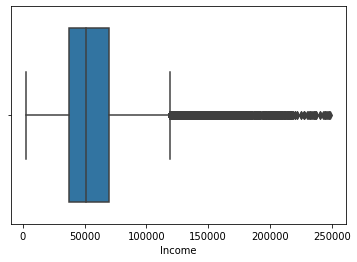

In [18]:
sns.boxplot(df1['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


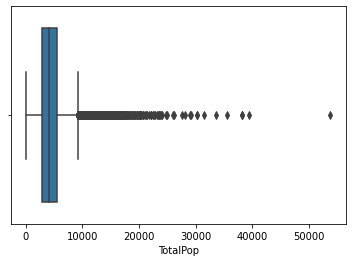

In [19]:
sns.boxplot(df1['TotalPop'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


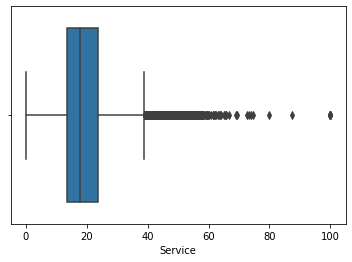

In [20]:
sns.boxplot(df1['Service'])

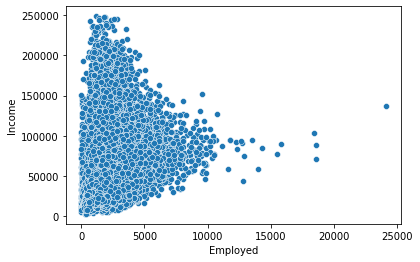

In [21]:
sns.scatterplot(data=df1, x="Employed", y="Income")

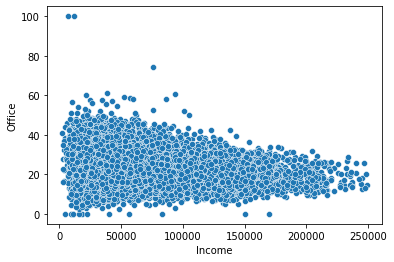

In [22]:
sns.scatterplot(data=df1, x="Income", y="Office")

# Correlation in variables for 2015 census data

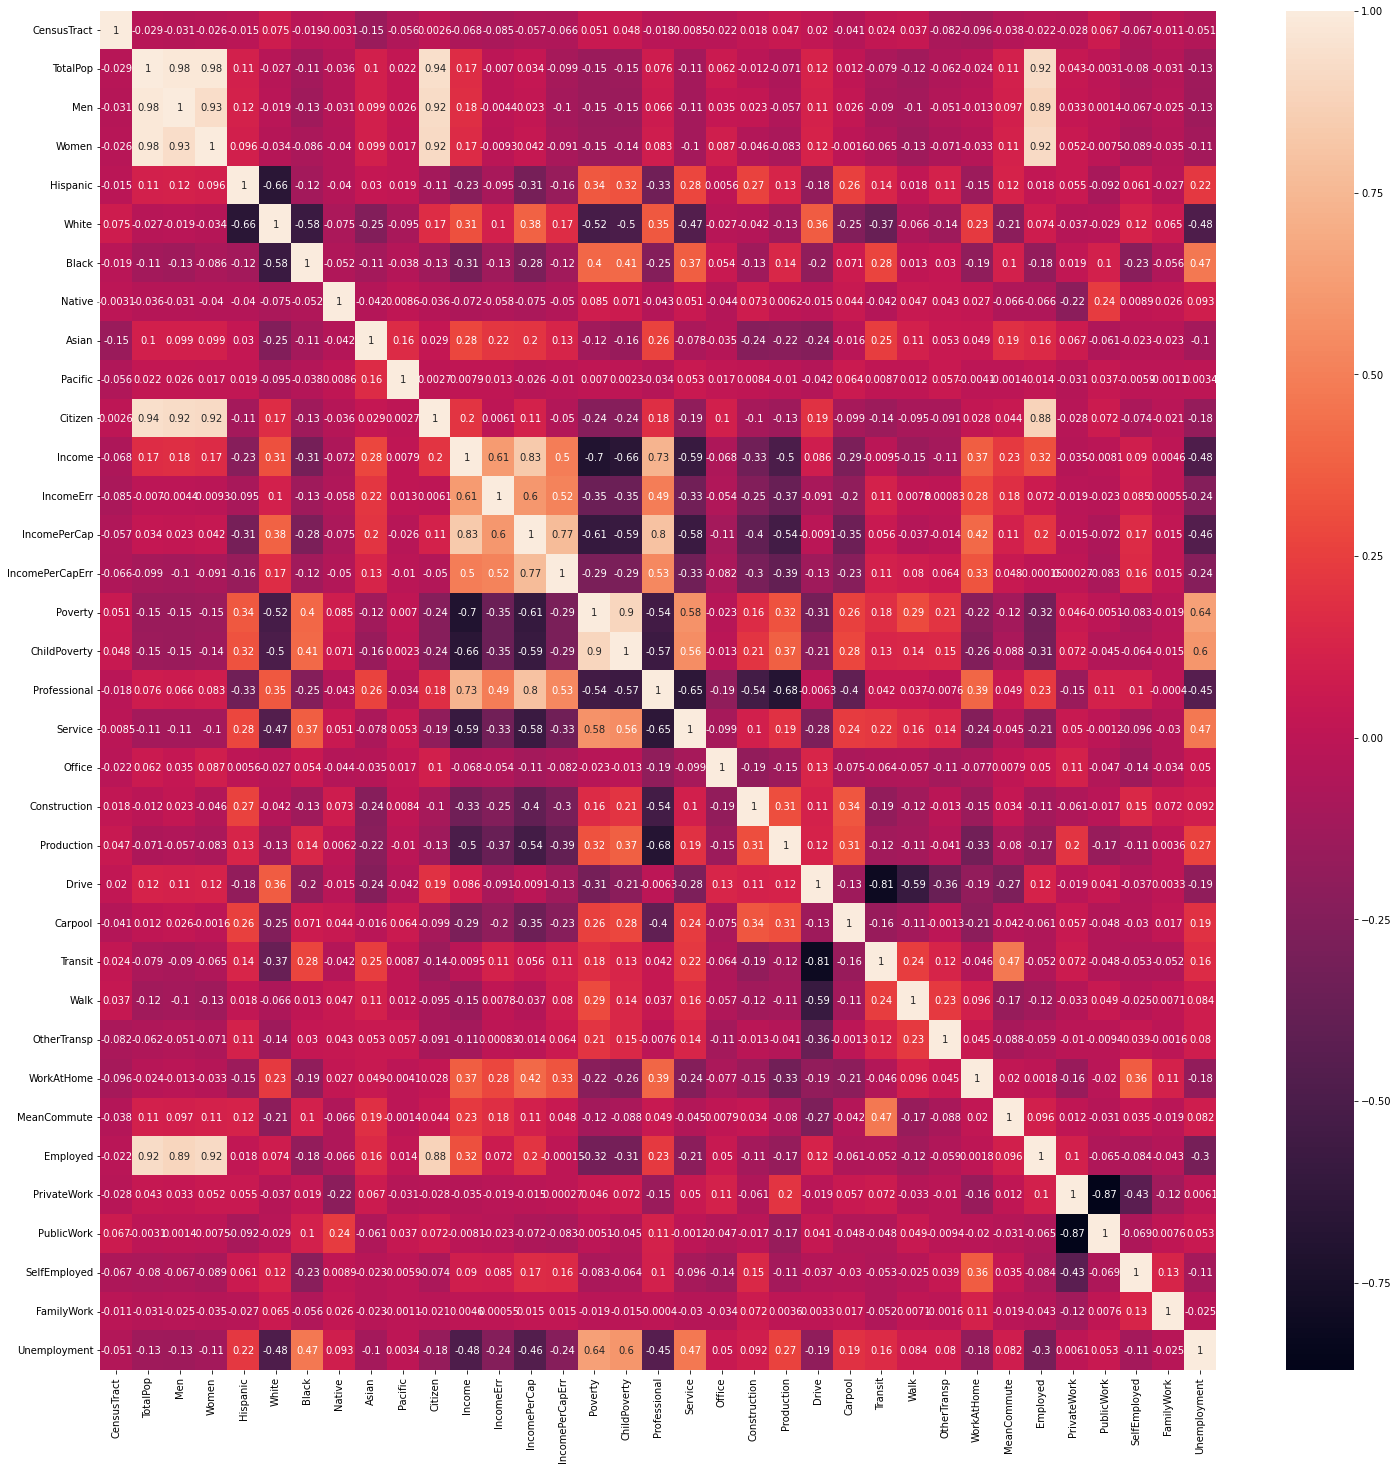

In [23]:
corr_matrix = df1.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corr_matrix,annot=True)

# Preliminary Visualizations using 2015 census data

We have cheched the census data of 2015 and tried making few Preliminary Visualization.

Below are the few Visualizations we have made on 2015 data

# GDP per capita

In [24]:
state_income1 = df1.groupby(['State']).mean(['IncomePerCap']).reset_index()[['State', 'IncomePerCap']]
state_income1.head()

,State,IncomePerCap
0,Alabama,22840.097021
1,Alaska,33003.228916
2,Arizona,26363.113891
3,Arkansas,22126.816058
4,California,31154.595604


Text(0.5, 1.0, 'GDP per Capita by states')

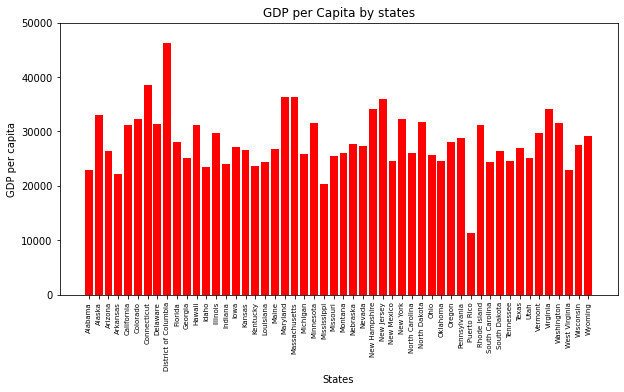

In [25]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.bar(state_income1['State'], state_income1['IncomePerCap'], color = 'red')
plt.ylim(0,50000)
plt.xticks(fontsize = 7, rotation=90)
plt.xlabel("States")
plt.ylabel("GDP per capita")
plt.title("GDP per Capita by states")

# Total population

In [26]:
df1['minority'] = round(((df1['Hispanic']+df1['Black']+df1['Native']+df1['Asian']+df1['Pacific'])*df1['TotalPop'])/100)
pop_diversity1 = df1.groupby(['State']).sum().sort_values('minority').reset_index()[['State', "TotalPop", 'minority']]

Text(0.5, 1.0, 'Total population by states')

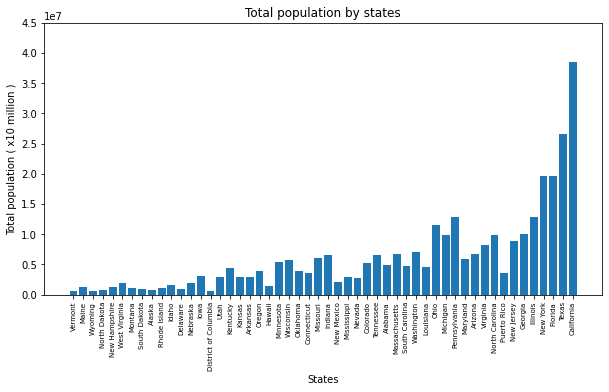

In [27]:
plt.figure(figsize=(10,5))
plt.bar(pop_diversity1['State'], pop_diversity1['TotalPop'])
plt.ylim(0,45000000)
plt.xticks(fontsize = 7, rotation=90)
plt.xlabel("States")
plt.ylabel("Total population ( x10 million )")
plt.title("Total population by states")

# Total pop vs minority pop

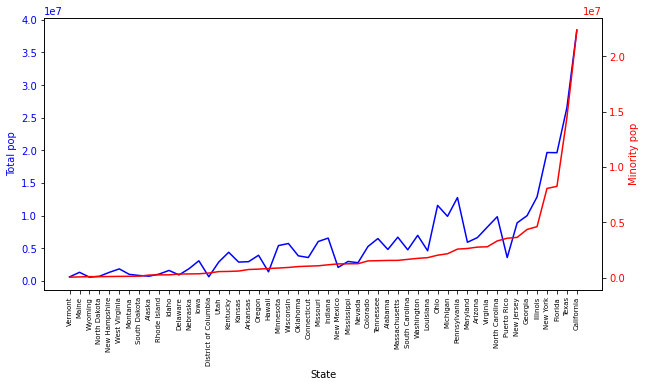

In [28]:
fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.set_xlabel('State')
ax1.set_ylabel('Total pop', color = 'blue')
ax1.plot(pop_diversity1['State'], pop_diversity1['TotalPop'], color = 'blue')
ax1.tick_params(axis ='y', labelcolor = 'blue')
ax1.tick_params(axis ='x', labelrotation = 90, labelsize = 7)

# Adding Twin Axes

ax2 = ax1.twinx()

ax2.set_ylabel('Minority pop', color = 'red')
ax2.plot(pop_diversity1['State'],pop_diversity1['minority'] , color = 'red')
ax2.tick_params(axis ='y', labelcolor = 'red')

# Checking for Data Imbalance in 2015 census data

A dataset is uneven when certain target classes have considerably lower frequencies than others, according to "https://www.yourdatateacher.com/2022/06/27/is-your-dataset-imbalanced/" There is some asymmetry in our dataset. Minorities, for example, would always be underrepresented. Another example is that almost 80-90 percent of individuals in each county use their own automobile as their primary source of transportation.

Below are the two plots that shows data imbalance

Text(0, 0.5, 'Number of counties')

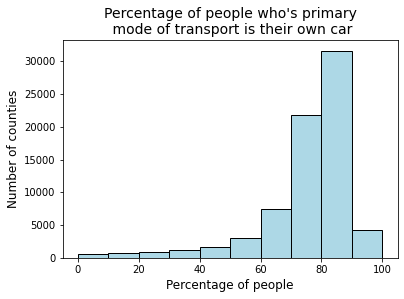

In [30]:
plt.hist(df1['Drive'], color = "lightblue", ec="black")
plt.title("Percentage of people who's primary\n mode of transport is their own car" , fontsize = 14)
plt.xlabel("Percentage of people", fontsize = 12)
plt.ylabel("Number of counties", fontsize = 12)

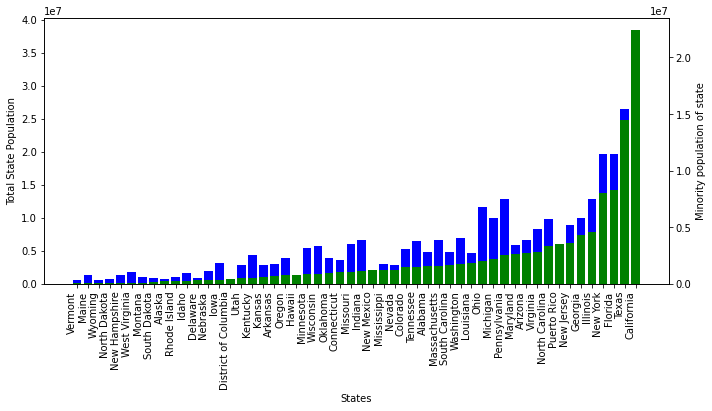

In [31]:
fig, ax = plt.subplots(figsize = (10, 5))


ax2 = ax.twinx()

# creating a bar plot

ax.bar(pop_diversity1['State'], pop_diversity1["TotalPop"], color = 'blue')
ax2.bar(pop_diversity1['State'], pop_diversity1["minority"], color = 'green')

# Label axes

ax.set_xlabel('States')
ax.set_ylabel('Total State Population')
ax2.set_ylabel('Minority population of state')

# defining layout
plt.tight_layout()
fig.autofmt_xdate(rotation=90)

# show plot
plt.show()

In [9]:
%%shell
jupyter nbconvert --to html '/content/2015_dataset.ipynb'

[NbConvertApp] Converting notebook /content/2015_dataset.ipynb to html
[NbConvertApp] Writing 1269611 bytes to /content/2015_dataset.html
